# Climatologies of the ERA-5 surface fluxes and the CMEMS surface properties averaged over the DCA

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import seaborn as sns
sns.set_style('darkgrid')
from info import datadir, figdir, getMonths

In [2]:
data = pd.read_csv(datadir+'monthly_timeseries.csv',index_col=0)
dates = pd.to_datetime(data['dates'])

In [3]:
months = getMonths(dates)
month_labels_shift = ['J', 'J', 'A', 'S', 'O', 'N', 'D', 'J', 'F', 'M', 'A', 'M'] # for shift=5: start in June

def makeClim(data,shift=5):
    data_clim = np.zeros(12)
    for i in range(12):
        data_clim[i] = np.nanmean([data[j] for j in months[(i+shift)%12]],axis=0)
    return data_clim
        
E_clim = makeClim(data['E'])
P_clim = makeClim(data['P'])
E_P_clim = makeClim(data['E_P'])
Q_clim = makeClim(data['Q'])
surfS_clim = makeClim(data['surfS'])
surfT_clim = makeClim(data['surfT'])

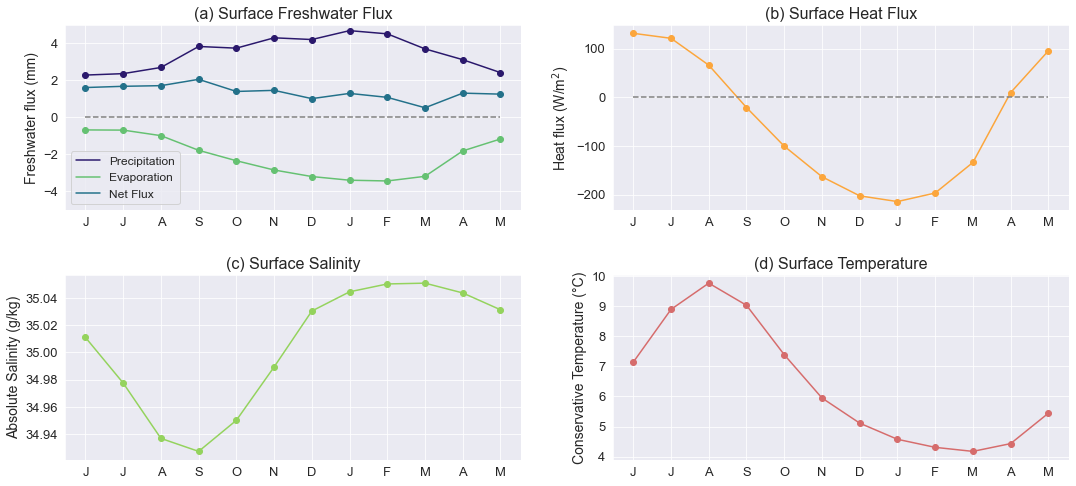

In [4]:
def plotClim(ax,data,color,label,legend=None):
    ax.plot(range(12),data,color=color,label=legend)
    ax.scatter(range(12),data,color=color)
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xticks(range(12))
    ax.set_xticklabels(month_labels_shift, fontsize=13)
    ax.set_ylabel(label,fontsize=14)

cmap_S = matplotlib.cm.get_cmap('cmo.haline')
cmap_T = matplotlib.cm.get_cmap('cmo.thermal')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(18,8))

plotClim(ax1,P_clim*1e3,cmap_S(0),'Freshwater flux (mm)',legend='Precipitation')
plotClim(ax1,E_clim*1e3,cmap_S(0.7),'Freshwater flux (mm)',legend='Evaporation')
plotClim(ax1,E_P_clim*1e3,cmap_S(0.35),'Freshwater flux (mm)',legend='Net Flux')
ax1.plot(range(12),np.zeros(12),'gray',linestyle='dashed')
ax1.legend(fontsize=12)
ax1.set_ylim(-5,5)
ax1.set_title('(a) Surface Freshwater Flux',fontsize=16)

plotClim(ax2,Q_clim/(24*60*60),cmap_T(0.8),'Heat flux (W/m$^2$)')
ax2.plot(range(12),np.zeros(12),'gray',linestyle='dashed')
ax2.set_title('(b) Surface Heat Flux',fontsize=16)

plotClim(ax3,surfS_clim,cmap_S(0.8),'Absolute Salinity (g/kg)')
ax3.set_title('(c) Surface Salinity',fontsize=16)

plotClim(ax4,surfT_clim,cmap_T(0.6),'Conservative Temperature ('+'\u00B0'+'C)')
ax4.set_title('(d) Surface Temperature',fontsize=16)

plt.subplots_adjust(hspace=0.35)
plt.savefig(figdir+'surface_forcing_clim.png',bbox_inches='tight')
plt.show()